# Perkenalan

Nama : Muhammad Fauzan

Graded Challenge 1

This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:

*  (#) ID for each pokemon
Name: Name of each pokemon

*  Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

*  Type 2: Some pokemon are dual type and have 2

*  Total: sum of all stats that come after this, a general guide to how strong a pokemon is

*  HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

*  Attack: the base modifier for normal attacks (eg. Scratch, Punch)

*  Defense: the base damage resistance against normal attacks

*  SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

*  SP Def: the base damage resistance against special attacks

*  Speed: determines which pokemon attacks first each round

## Objectives

*   Saya ingin mengetahui pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, dan bertipe Fire
*   Saya ingin mengetahui pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, namun dari semua tipe
*   Saya ingin mengetahui rata-rata dari Total, HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed dari pokemon legendary menggunakan sistem Grouping berdasarkan type dan generation


# Import Pustaka

In [1]:
import numpy as np
import pandas as pd

# Data Loading

Import dataset pokemon terlebih dahulu ke dalam google colab agar bisa diolah dan simpan ke dalam sebuah variabel

In [2]:
df = pd.read_csv('/content/Pokemon.csv')

Mari kita lihat isi dari 15 data teratas dari dataset dan 15 data paling bawah dari dataset

In [3]:
df.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
df.tail(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


Kita juga dapat melihat sekilas beberapa pokemon legendary

In [5]:
df[df['Legendary']==True].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Mari kita hitung total pokemon legendary yang ada di dataset

In [6]:
df[df['Legendary']==True].count()

#             65
Name          65
Type 1        65
Type 2        40
Total         65
HP            65
Attack        65
Defense       65
Sp. Atk       65
Sp. Def       65
Speed         65
Generation    65
Legendary     65
dtype: int64

Terdapat 65 pokemon legendary di dalam dataset

# Data Cleaning

Saya ingin menghapus kolom yang tidak saya gunakan. Salah satunya adalah kolom #

In [7]:
df=df.drop(['#'],axis=1)

Kemudian cek nama-nama kolom dan juga shape dari data frame

In [8]:
print(df.columns)
print(df.shape)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
(800, 12)


Kemudian saya ingin membuat kolom 'Name' menjadi indeks utama

In [9]:
df = df.set_index('Name')
df.head(15)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Untuk beberapa nama pokemon, ada teks yang tidak dibutuhkan sebelum kata 'Mega'.  Saya ingin membuat teks tersebut

In [10]:
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(15)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


Kemudian, saya ingin menghapus 'Type 2' pokemon dan mengubah pokemon di dataset hanya mempunyai satu tipe. Saya juga akan mengubah nama 'Type 1' menjadi 'Type'

In [11]:
df = df.drop(['Type 2'],axis=1)
df = df.rename({'Type 1': 'Type'}, axis=1)
df.head(15)

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,405,60,62,63,80,80,60,1,False
Venusaur,Grass,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,625,80,100,123,122,120,80,1,False
Charmander,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,634,78,104,78,159,115,100,1,False


# Eksplorasi Data

Saya ingin mengetahui pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, dan bertipe Fire

In [12]:
df[
    (df['Legendary'] == True) &
    (df['HP'] > 80) &
    (df['Attack'] > 100) &
    (df['Type'] == 'Fire')
]

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Entei,Fire,580,115,115,85,90,75,100,2,True
Ho-oh,Fire,680,106,130,90,110,154,90,2,True


Saya juga ingin mengetahui pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, namun dari semua tipe

In [13]:
df[
    (df['Legendary'] == True) &
    (df['HP'] > 80) &
    (df['Attack'] > 100)
]

,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,Psychic,780,106,190,100,154,100,130,1,True
Mega Mewtwo Y,Psychic,780,106,150,70,194,120,140,1,True
Entei,Fire,580,115,115,85,90,75,100,2,True
Ho-oh,Fire,680,106,130,90,110,154,90,2,True
KyogrePrimal Kyogre,Water,770,100,150,90,180,160,90,3,True
Groudon,Ground,670,100,150,140,100,90,90,3,True
GroudonPrimal Groudon,Ground,770,100,180,160,150,90,90,3,True
Rayquaza,Dragon,680,105,150,90,150,90,95,3,True


Kemudian, saya ingin mengetahui rata-rata dari Total, HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed dari pokemon legendary menggunakan sistem Grouping berdasarkan type dan generation

In [22]:
df[(df['Legendary'] == True)].groupby(['Type','Generation']).mean()

Total          HP  ...       Speed  Legendary
Type     Generation                          ...                       
Dark     4           600.000000   70.000000  ...  125.000000       True
         6           680.000000  126.000000  ...   99.000000       True
Dragon   3           676.666667   88.333333  ...  108.333333       True
         5           684.000000  115.000000  ...   93.000000       True
         6           600.000000  108.000000  ...   95.000000       True
Electric 1           580.000000   90.000000  ...  100.000000       True
         2           580.000000   90.000000  ...  115.000000       True
         5           580.000000   79.000000  ...  106.000000       True
Fairy    6           680.000000  126.000000  ...   99.000000       True
Fire     1           580.000000   90.000000  ...   90.000000       True
         2           630.000000  110.500000  ...   95.000000       True
         4           600.000000   91.000000  ...   77.000000       True
         6           600.000000   80.000000  ...   70.000000       True
Flying   5           580.000000   79.000000  ...  116.000000       True
Ghost    4           680.000000  150.000000  ...   90.000000       True
Grass    4           600.000000  100.000000  ...  113.500000       True
         5           580.000000   91.000000  ...  108.000000       True
Ground   3           720.000000  100.000000  ...   90.000000       True
         5           600.000000   89.000000  ...   96.000000       True
Ice      1           580.000000   90.000000  ...   85.000000       True
         3           580.000000   80.000000  ...   50.000000       True
Normal   4           695.000000  115.000000  ...  110.000000       True
Psychic  1           746.666667  106.000000  ...  133.333333       True
         2           680.000000  106.000000  ...  110.000000       True
         3           600.000000   50.000000  ...  142.500000       True
         4           580.000000   76.666667  ...   96.666667       True
         5           600.000000  100.000000  ...  100.000000       True
         6           640.000000   80.000000  ...   75.000000       True
Rock     3           580.000000   80.000000  ...   50.000000       True
         5           580.000000   91.000000  ...  108.000000       True
         6           650.000000   50.000000  ...   80.000000       True
Steel    3           590.000000   90.000000  ...   75.000000       True
         4           680.000000  100.000000  ...   90.000000       True
         5           580.000000   91.000000  ...  108.000000       True
Water    2           580.000000  100.000000  ...   85.000000       True
         3           720.000000  100.000000  ...   90.000000       True
         4           680.000000   90.000000  ...  100.000000       True

[37 rows x 8 columns]

# Pengambilan Kesimpulan

Dari objektif saya mengenai pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, dan bertipe Fire ; pokemon tersebut adalah Entei dan Ho-oh

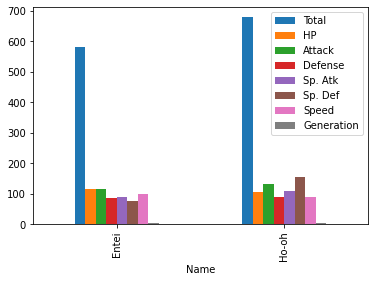

In [26]:
df[
    (df['Legendary'] == True) &
    (df['HP'] > 80) &
    (df['Attack'] > 100) &
    (df['Type'] == 'Fire')
].plot(kind = 'bar')

Dari objektif saya mengenai pokemon legendary apa saja yang memiliki HP diatas 80, Attack diatas 100, Defense diatas 50, namun dari semua tipe; Ada 26 pokemon yang masuk ke dalam kategori tersebut

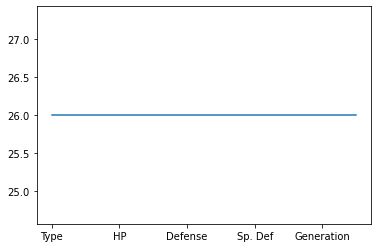

In [31]:
df[
    (df['Legendary'] == True) &
    (df['HP'] > 80) &
    (df['Attack'] > 100)
].count().plot()

Dari objektif saya mengenai rata-rata dari Total, HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed dari pokemon legendary menggunakan sistem Grouping berdasarkan type dan generation; terdapat variasi dari rata-rata Total, HP, Attack, Defense, Sp. Atk, Sp. Def, dan Speed dari pokemon legendary hanya berdasarkan Type dan Generation nya saja.

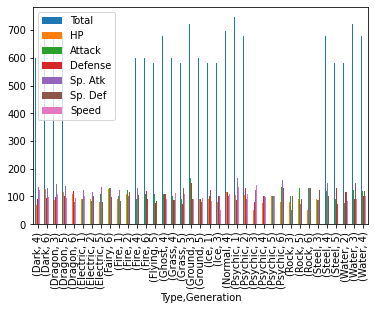

In [37]:
df[(df['Legendary'] == True)].groupby(['Type','Generation']).mean().plot(kind = 'bar')